In [12]:
import torch
import os
from model.BiSeNet import BiSeNet
import os.path as osp
import numpy as np
from PIL import Image
import torchvision.transforms as transforms
import cv2
import matplotlib.pyplot as plt
# os.environ['CUDA_VISIBLE_DEVICES'] ='1'

In [75]:
def evaluate(image_path='vFG112.png', cp='/home/thaontp79/makeup/BeautyGAN/model/cp/79999_iter.pth'):

#     if not os.path.exists(respth):
#         os.makedirs(respth)
    ### HI ###
    #   17 hair
    #   12: upper lip
    #   13: lower lip
    #   1: face
    #   2, 3: eyes brow
    #   10: nose
    #   14: neck
    n_classes = 19
    net = BiSeNet(n_classes=n_classes)
    net.cuda()
    net.load_state_dict(torch.load(cp))
    net.eval()

    to_tensor = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    ])

    with torch.no_grad():
        img = Image.open(image_path)
        img = img.resize((512, 512), Image.BILINEAR)
        img = to_tensor(img)
        img = torch.unsqueeze(img, 0)
        img = img.cuda()
        out = net(img)[0]
        parsing = out.squeeze(0).cpu().numpy().argmax(0)
        return parsing

In [85]:
result = evaluate('/home/thaontp79/makeup/BeautyGAN/angles/sample/223_02_03_190_10.jpg')

In [92]:
result=result.astype('float32')
cv2.resize(result, (256, 256))

array([[17., 17., 17., ...,  0.,  0.,  0.],
       [17., 17., 17., ...,  0.,  0.,  0.],
       [17., 17., 17., ...,  0.,  0.,  0.],
       ...,
       [17., 17., 17., ...,  0.,  0.,  0.],
       [17., 17., 17., ...,  0.,  0.,  0.],
       [17., 17., 17., ...,  0.,  0.,  0.]], dtype=float32)

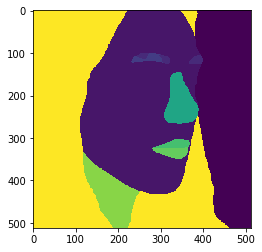

In [77]:
plt.imshow(result)

In [74]:
s

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

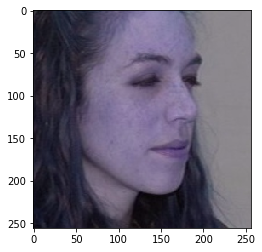

IndexError: index 256 is out of bounds for axis 0 with size 256

In [69]:
s = np.zeros((512, 512, 3))
img = cv2.imread('/home/thaontp79/makeup/BeautyGAN/angles/sample/223_02_03_190_10.jpg')
img = cv2.resize(img, (256, 256))
# s[np.where(result==17)]=1
# np.replace()
plt.imshow(img)
plt.show()
img[np.where(result==17)]=s[np.where(result==17)]
img[np.where(result==0)]=s[np.where(result==0)]
plt.imshow(img)

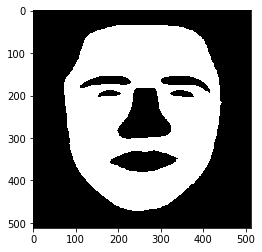

In [86]:
img= cv2.imread('/home/thaontp79/makeup/BeautyGAN/vFG112.png')
# plt.imshow(img)
# plt.imshow(result, alpha = 0.3)
plt.imshow(s)

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [16]:
# -*- coding: utf-8 -*-
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
# import tensorflow as tf
from tensorflow.python.framework import ops
import numpy as np
import os
import glob
# from imageio import imread, imsave
import cv2
import argparse
import time
from PIL import Image
from model.BiSeNet import BiSeNet
import torch
import torchvision.transforms as transforms

def evaluate(img, cp='/home/thaontp79/makeup/BeautyGAN/model/cp/79999_iter.pth'):

#     if not os.path.exists(respth):
#         os.makedirs(respth)
#     img=img[0,:,:,:]
#     print(img.shape)
    n_classes = 19
    net = BiSeNet(n_classes=n_classes)
    net.cuda()
    net.load_state_dict(torch.load(cp))
    net.eval()
    
    to_tensor = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    ])

    with torch.no_grad():
#         img = Image.open(image_path)
#         print(img, type(img), img.shape)
#         print(img)
#         img = cv2.resize(img, (512, 512))
        img = to_tensor(img)
        img = torch.unsqueeze(img, 0)
        img = img.cuda()
        print(type(img), img.shape)
        out = net(img)[0]
        parsing = out.squeeze(0).cpu().numpy().argmax(0)
        
        return parsing

path='/home/thaontp79/makeup/BeautyGAN/imgs/no_makeup/xfsy_0503.png'

def preprocess(img):
    return (img / 255. - 0.5) * 2

def deprocess(img):
    return (img + 1) / 2

batch_size = 1
img_size = 256
no_makeup = cv2.resize(cv2.imread(path), (img_size, img_size))
face = evaluate(no_makeup)

face

<class 'torch.Tensor'> torch.Size([1, 3, 256, 256])


array([[17, 17, 17, ...,  0,  0,  0],
       [17, 17, 17, ...,  0,  0,  0],
       [17, 17, 17, ...,  0,  0,  0],
       ...,
       [16, 16, 16, ...,  0,  0,  0],
       [16, 16, 16, ...,  0,  0,  0],
       [16, 16, 16, ...,  0,  0,  0]])

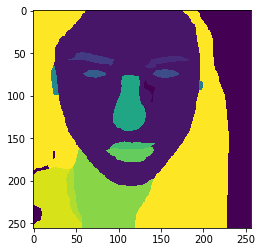

In [35]:

im=cv2.resize(cv2.imread(path), (img_size, img_size))
plt.imshow(face)
# plt.imshow(im[np.where(face==0)])

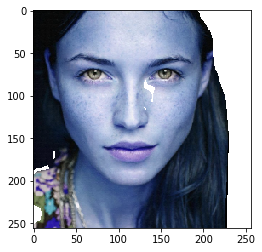

In [42]:
s = im
s[np.where(face==0)]=-1
# np.replace()
plt.imshow(s)